<a href="https://colab.research.google.com/github/pampamlopes/ai_unsupervised/blob/main/kmeans_without_label.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
#lendo o dataset
df = pd.read_csv('dados.csv')

In [3]:
#visualindo dados do dataset
df.head(10)

,county,cases,deaths
0,Abbeville,84,0
1,Acadia,741,21
2,Accomack,116,0
3,Ada,4264,41
4,Adair,325,8
5,Adams,5003,101
6,Addison,470,0
7,Aiken,298,10
8,Alachua,1763,0
9,Alamance,209,0


In [4]:
df.describe()

,cases,deaths
count,1570.000000,1570.000000
mean,2633.903822,69.952229
std,24352.089822,842.722792
min,1.000000,0.000000
25%,34.000000,0.000000
50%,133.500000,0.000000
75%,632.750000,17.000000
max,868824.000000,31887.000000


In [9]:
X = df.iloc[:,[1,2]].values
X

array([[ 84,   0],
       [741,  21],
       [116,   0],
       ...,
       [  8,   0],
       [216,   0],
       [  4,   0]])

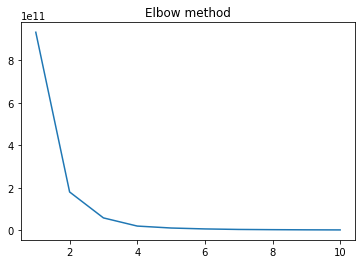

In [27]:
#Elbow method
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init= 20)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title("Elbow method")
plt.show()


In [32]:
#Aplicando o Kmeans com K=2
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10)
clusters = kmeans.fit_predict(X)
clusters

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [33]:
#Incluindo os labels no dataset
df['Cluster'] = clusters
df.head()

,county,cases,deaths,Cluster
0,Abbeville,84,0,0
1,Acadia,741,21,0
2,Accomack,116,0,0
3,Ada,4264,41,0
4,Adair,325,8,0


In [34]:
#Verificando a quantidade de dados em cada cluster
df['Cluster'].value_counts()

0    1569
1       1
Name: Cluster, dtype: int64

In [40]:
cluster_1 = df['Cluster'] == 1
df[cluster_1]

,county,cases,deaths,Cluster
995,New York City,868824,31887,1
